In [29]:
import urllib.request
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
response = urllib.request.urlopen('https://www.python.org')
#print(response.read().decode('utf-8'))

In [30]:
import pandas as pd
import json 
import xmltodict
from Bio import Medline
from Bio import Entrez
# Entrez.email = "folooyi@outlook.com" # replace it with your email
Entrez.email = "ymou32@gatech.edu" # replace it with your email

In [31]:

from pymed import PubMed
from datetime import date

pubmed = PubMed(tool="PubMedSearcher", email="ymou32@gatech.edu")

## PUT YOUR SEARCH TERM HERE ##
search_term = "Stomach Cancer"
results = pubmed.query(search_term, max_results=1500)

articleList = []
articleInfo = []

for article in results:
# Print the type of object we've found (can be either PubMedBookArticle or PubMedArticle).
# We need to convert it to dictionary with available function
    articleDict = article.toDict()
    articleList.append(articleDict)

# Generate list of dict records which will hold all article details that could be fetch from PUBMED API
print(articleList[0].keys())
for article in articleList:
#Sometimes article['pubmed_id'] contains list separated with comma - take first pubmedId in that list - thats article pubmedId
    pubmedId = article['pubmed_id'].partition('\n')[0]
    
    info_dict = {u'pubmed_id':pubmedId,
                   u'title':article['title'],
                   u'abstract':article['abstract'],
                   u'copyrights':article['copyrights'],
                   #u'doi':article['doi'],
                   u'publication_date':article['publication_date'], 
                   u'authors':article['authors']}
    
    info_dict[u'keywords'] = article['keywords'] if 'keywords' in article else "none"
    info_dict[u'journal'] = article['journal'] if 'journal' in article else "none"
    info_dict[u'conclusions'] = article['conclusions'] if 'conclusions' in article else "none"
    info_dict[u'methods'] = article['methods'] if 'methods' in article else "none"
    info_dict[u'results'] = article['results'] if 'results' in article else "none"
    #info_dict[u'xml'] = article['xml'] if 'xml' in article else "none"
    # Append article info to dictionary
    articleInfo.append(info_dict)


# Generate Pandas DataFrame from list of dictionaries
articlesPD = pd.DataFrame.from_dict(articleInfo)
export_csv = articlesPD.to_csv (r'search.csv', index = None, header=True) 

#Print first 10 rows of dataframe
print(articlesPD.head(10))

dict_keys(['pubmed_id', 'title', 'abstract', 'keywords', 'journal', 'publication_date', 'authors', 'methods', 'conclusions', 'results', 'copyrights', 'doi', 'xml'])
  pubmed_id                                              title  \
0  33181813  [Why is it important to detect atrophic gastri...   
1  33181754  18F-FDG PET/CT in a Rare Case of Poland Syndro...   
2  33181006  Postgastrectomy gastric cancer patients are at...   
3  33180314  Colonic interposition, a contemporary experien...   
4  33179620  Precancerous lesions of the stomach, gastric c...   
5  33179005  Voluminous abdominal gastrointestinal stromal ...   
6  33178597  Crosstalk Between Cancer Associated Fibroblast...   
7  33178590  Spectrum of Mesenchymal-Epithelial Transition ...   
8  33177022  [Tubular gastric elongation surgery for high e...   
9  33176054  Innovative marking method using novel endoscop...   

                                            abstract  \
0  Gastric intestinal metaplasia and atrophic gas...

In [32]:
articlesPD

,pubmed_id,title,abstract,copyrights,publication_date,authors,keywords,journal,conclusions,methods,results
0,33181813,[Why is it important to detect atrophic gastri...,Gastric intestinal metaplasia and atrophic gas...,None,2020-11-13,"[{'lastname': 'Sarem', 'firstname': 'Muhannad'...",[],Revista de gastroenterologia del Peru : organo...,None,None,None
1,33181754,18F-FDG PET/CT in a Rare Case of Poland Syndro...,Poland syndrome is a rare congenital anomaly c...,None,2020-11-13,"[{'lastname': 'Loharkar', 'firstname': 'Sarves...",[],Clinical nuclear medicine,None,None,None
2,33181006,Postgastrectomy gastric cancer patients are at...,Several studies have shown that colorectal neo...,None,2020-11-13,"[{'lastname': 'Gweon', 'firstname': 'Tae-Geun'...","[Colonoscopic surveillance, Colonoscopy, Color...",Intestinal research,None,None,None
3,33180314,"Colonic interposition, a contemporary experien...",Colonic interposition is rarely used as an oes...,None,2020-11-13,"[{'lastname': 'Fearon', 'firstname': 'Naomi M'...","[Colon interposition, Oesophageal cancer, Surg...",Updates in surgery,None,None,None
4,33179620,"Precancerous lesions of the stomach, gastric c...",Gastric cancer accounts for about 6% of cancer...,Copyright © 2020 Società Italiana di Anatomia ...,2020-11-13,"[{'lastname': 'Gullo', 'firstname': 'Irene', '...","[gastric adenocarcinoma, gastric cancer, gastr...",Pathologica,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
1494,32160618,The Potential Role of Radiotherapy in the Mana...,Hepatoid adenocarcinoma (AC) of the stomach (H...,"© 2020 S. Karger AG, Basel.",2020-03-12,"[{'lastname': 'Ilyas', 'firstname': 'Waqas', '...","[Gastric cancer, Gastrointestinal cancer, Hepa...",Oncology research and treatment,RT may have a role in the multimodality manage...,None,None
1495,32160410,Inferior prognosis of gastric involvement in p...,Due to limited information reported on the cli...,© 2020 The Authors. Cancer Medicine published ...,2020-03-12,"[{'lastname': 'Xie', 'firstname': 'Yi', 'initi...","[SEER, gastric cancer, lymphoma, prognostic fa...",Cancer medicine,None,None,None
1496,32159312,[Differential diagnostics of gastric cancer an...,The lack of specific symptoms for the early de...,None,2020-03-12,"[{'lastname': 'Titov', 'firstname': 'S E', 'in...","[dysplasia, gastric cancer, miRNA, molecular d...",Klinicheskaia laboratornaia diagnostika,None,None,None
1497,32158613,,,© 2019 The Author(s). Published by Informa UK ...,2020-03-12,"[{'lastname': 'Lee', 'firstname': 'Hana', 'ini...","[Geranium thunbergii, apoptosis, cell cycle ar...",Animal cells and systems,None,None,None


In [33]:
import pandas as pd

df1 = pd.read_csv('search.csv', engine='python')
df1["journal"] = df1["journal"].str.lower()
df2 = pd.read_csv('journal.csv', engine='python')
df2["journal"] = df2["journal"].str.lower()

df = df1.merge(df2, on='journal',how = 'left')
export_csv = df.to_csv (r'search_with_journal.csv', index = None, header=True) 
#df = df.sort_values(by=["Journal Impact Factor"],ascending=False)
df

,pubmed_id,title,abstract,copyrights,publication_date,authors,keywords,journal,conclusions,methods,results,Rank,Total Cites,Journal Impact Factor,Eigenfactor Score
0,33181813,[Why is it important to detect atrophic gastri...,Gastric intestinal metaplasia and atrophic gas...,NaN,2020-11-13,"[{'lastname': 'Sarem', 'firstname': 'Muhannad'...",[],revista de gastroenterologia del peru : organo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,33181754,18F-FDG PET/CT in a Rare Case of Poland Syndro...,Poland syndrome is a rare congenital anomaly c...,NaN,2020-11-13,"[{'lastname': 'Loharkar', 'firstname': 'Sarves...",[],clinical nuclear medicine,NaN,NaN,NaN,671,"5,042",6.587,0.00620
2,33181006,Postgastrectomy gastric cancer patients are at...,Several studies have shown that colorectal neo...,NaN,2020-11-13,"[{'lastname': 'Gweon', 'firstname': 'Tae-Geun'...","['Colonoscopic surveillance', 'Colonoscopy', '...",intestinal research,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,33180314,"Colonic interposition, a contemporary experien...",Colonic interposition is rarely used as an oes...,NaN,2020-11-13,"[{'lastname': 'Fearon', 'firstname': 'Naomi M'...","['Colon interposition', 'Oesophageal cancer', ...",updates in surgery,NaN,NaN,NaN,4161,913,2.587,0.00200
4,33179620,"Precancerous lesions of the stomach, gastric c...",Gastric cancer accounts for about 6% of cancer...,Copyright 漏 2020 Societ脿 Italiana di Anatomia ...,2020-11-13,"[{'lastname': 'Gullo', 'firstname': 'Irene', '...","['gastric adenocarcinoma', 'gastric cancer', '...",pathologica,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,32160618,The Potential Role of Radiotherapy in the Mana...,Hepatoid adenocarcinoma (AC) of the stomach (H...,"漏 2020 S. Karger AG, Basel.",2020-03-12,"[{'lastname': 'Ilyas', 'firstname': 'Waqas', '...","['Gastric cancer', 'Gastrointestinal cancer', ...",oncology research and treatment,RT may have a role in the multimodality manage...,NaN,NaN,5953,910,1.967,0.00266
1510,32160410,Inferior prognosis of gastric involvement in p...,Due to limited information reported on the cli...,漏 2020 The Authors. Cancer Medicine published ...,2020-03-12,"[{'lastname': 'Xie', 'firstname': 'Yi', 'initi...","['SEER', 'gastric cancer', 'lymphoma', 'progno...",cancer medicine,NaN,NaN,NaN,2485,"6,732",3.491,0.01788
1511,32159312,[Differential diagnostics of gastric cancer an...,The lack of specific symptoms for the early de...,NaN,2020-03-12,"[{'lastname': 'Titov', 'firstname': 'S E', 'in...","['dysplasia', 'gastric cancer', 'miRNA', 'mole...",klinicheskaia laboratornaia diagnostika,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1512,32158613,NaN,NaN,漏 2019 The Author(s). Published by Informa UK ...,2020-03-12,"[{'lastname': 'Lee', 'firstname': 'Hana', 'ini...","['Geranium thunbergii', 'apoptosis', 'cell cyc...",animal cells and systems,NaN,NaN,NaN,10220,305,0.907,0.00049


In [34]:
#the above dealing with keyword, generate keywords count csv

In [35]:
col_keywords = articlesPD['keywords'].tolist()

col_keywords = list(filter(None, col_keywords))
#col_keywords
#print((",").join(str(i) for i in col_keywords))
keywords=[]
for i in col_keywords:
    keywords+=i
print (keywords)

['Colonoscopic surveillance', 'Colonoscopy', 'Colorectal neoplasm', 'Stomach neoplasms', 'Colon interposition', 'Oesophageal cancer', 'Surgical techniques', 'Upper gastrointestinal surgery', 'gastric adenocarcinoma', 'gastric cancer', 'gastric dysplasia', 'hereditary diffuse gastric cancer (HDGC)', 'hereditary gastric cancer syndromes', 'Gastrointestinal stromal tumor (GIST)', 'case report', 'embolization', 'emergency surgery', 'radiofrequency procedure', 'cancer associated fibroblast', 'fibroblast growth factor receptor', 'gastric cancer', 'scirrhous carcinoma of the stomach', 'transforming growth factor β1', 'tumor microenvironment', 'gene alteration', 'gene mutation', 'mesenchymal–epithelial transition factor', 'outcome', 'pancancer', 'esophageal cancer', 'gastric tube', 'high esophageal-gastric anastomosis', 'tubular gastric lengthening surgery', 'gastric cancer', 'indocyanine green', 'near-infrared fluorescence', 'alpha-fetoprotein-producing gastric cancer', 'gastric cancer', 'hep

In [36]:
from wordcloud import WordCloud, STOPWORDS 
import collections
stopwords = set(STOPWORDS)

filtered_words = [word for word in keywords if word not in stopwords]
counted_words = collections.Counter(filtered_words)

word_count = {}
word_frequency = []
for letter, count in counted_words.most_common(30):
    counted_words[letter] = count
    
for i,j in counted_words.items():
        #print('Word: {0}, frequency count: {1}'.format(i,j))
        print('{0}, {1}'.format(i,j))
        #word_frequency.append('Word: {0}, frequency count: {1}'.format(i,j))
        word_frequency.append('{0},{1}'.format(i,j))


Colonoscopic surveillance, 1
Colonoscopy, 2
Colorectal neoplasm, 1
Stomach neoplasms, 82
Colon interposition, 1
Oesophageal cancer, 3
Surgical techniques, 2
Upper gastrointestinal surgery, 1
gastric adenocarcinoma, 5
gastric cancer, 110
gastric dysplasia, 1
hereditary diffuse gastric cancer (HDGC), 1
hereditary gastric cancer syndromes, 1
Gastrointestinal stromal tumor (GIST), 1
case report, 4
embolization, 1
emergency surgery, 1
radiofrequency procedure, 1
cancer associated fibroblast, 1
fibroblast growth factor receptor, 1
scirrhous carcinoma of the stomach, 1
transforming growth factor β1, 1
tumor microenvironment, 3
gene alteration, 1
gene mutation, 2
mesenchymal–epithelial transition factor, 1
outcome, 2
pancancer, 1
esophageal cancer, 11
gastric tube, 1
high esophageal-gastric anastomosis, 1
tubular gastric lengthening surgery, 1
indocyanine green, 1
near-infrared fluorescence, 1
alpha-fetoprotein-producing gastric cancer, 1
hepatoid adenocarcinoma of stomach, 1
immunotherapy, 6


tumorigenesis, 1
Enhanced recovery after surgery, 2
Retrospective Cohort study, 1
Perception, 1
Questionnaire survey, 1
Treatment selection, 1
gastric outlet obstruction, 2
palliative care, 3
AMPK, 1
Glioma, 1
Loss-of-function, 1
Pan-cancer, 1
Tumor metabolism, 1
AXIN2, 1
Gastric adenomas, 1
Hereditary cancer syndrome, 1
Hereditary colorectal cancer, 1
Hereditary polyposis, 1
Hypodontia, 1
Olfactory neuroblastoma, 1
Alpha-fetoproteins, 1
Clear cell adenocarcinoma, 1
Chinese burden of cancer, 1
Joinpoint analysis, 1
age–period–cohort analysis, 1
mortality and incidence, 1
trend, 2
STAD, 1
ceRNA, 1
lncRNA, 4
Dolichos lablab L., 1
HO-1, 2
Nrf2, 1
SRMD, 1
cytoprotection, 1
Anatomical classification, 1
Artificial intelligence, 4
Convolutional neural network (CNN), 1
Upper gastrointestinal tract, 1
Everolimus, 1
Lanreotide, 1
Neuroendocrine tumors, 3
ECL cell, 1
cell of origin, 1
dormancy, 1
hormones, 1
Cancer epidemiology, 2
Cancer incidence, 1
Costa Rica, 1
Latin America, 2
Social gradient

Occupation dust, 1
MSH2 gene, 1
clonal relationship, 1
predisposing gene, 1
whole-exome sequencing, 1
Barrett's esophagus, 1
EMI-137 targeting c-Met., 1
Structured roadmap, 1
standardized fluorescence molecular endoscopy methodology, 1
Idiopathic inflammatory myositis, 1
Lymph node dissection, 3
Cancer stem cells (CSC), 1
Octamer-binding transcription factor 4 (Oct4), 1
digestivesurgery, 1
emergencysurgery, 1
gastro-duodenalsurgery, 1
gastric carcinogenesis, 1
metabolic pathway, 1
nuclear magnetic resonance, 1
rat model, 1
tissue metabolomics, 1
A. coarctata Poir., 1
Achillea L., 1
HeLa cells, 1
MCF-7 cells, 1
cytotoxicity, 1
sesquiterpene lactones , 1
Bronchogenic cyst, 1
Endoscopic ultrasound-guided fine needle aspiration, 1
Submucosal lesion, 1
Analytical validation, 1
Hereditary cancer, 2
Multigene panel testing, 1
Next generation sequencing, 1
Gastrointestinal neoplasms, 2
immunologic antineoplastic agents, 1
monoclonal antibodies, 1
hyperbaric oxygen therapy, 1
hyperthermia, 1
me

In [37]:
search_wordcount = pd.DataFrame([sub.split(",") for sub in word_frequency])
#search_wordcount = search_wordcount.drop(columns=[2,3,4,5,6,7,8,9,10])
search_wordcount = search_wordcount[[0,1]]

export_csv = search_wordcount.to_csv (r'search_wordcount.csv', index = None, header=True) 
search_wordcount

,0,1
0,Colonoscopic surveillance,1
1,Colonoscopy,2
2,Colorectal neoplasm,1
3,Stomach neoplasms,82
4,Colon interposition,1
...,...,...
3445,lymphoma,1
3446,molecular diagnostics,1
3447,Geranium thunbergii,1
3448,cell cycle arrest,1


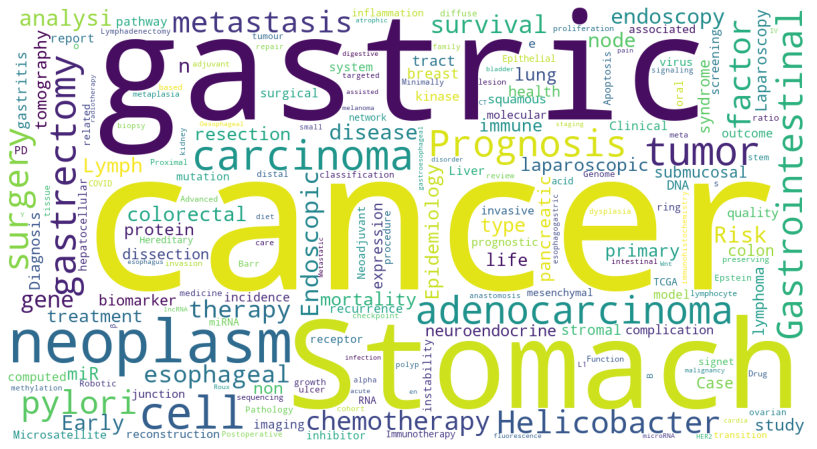

In [38]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
#convert list to string and generate
unique_string=(" ").join(keywords)
wordcloud = WordCloud(background_color="white", width = 1200, height = 650,collocations=False).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
#plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
#plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close() 

In [39]:
#dealing with author information

In [40]:
col_authors = articlesPD['authors'].tolist()
#print (col_authors)
affiliation_list=[]
for i in range(len(col_authors)):
    for j in col_authors[i]:
        if 'affiliation' in j.keys():
            affiliation_list.append(j['affiliation'])

In [41]:
import pandas as pd
def remove_none_elements_from_list(list):
     return [e for e in affiliation_list if(pd.notnull(e))]

affiliation_list

['Unidad de Endoscopia Digestiva, Hospital Dr. Diego Thompson. Buenos Aires, Argentina; Departamento de Ciencias Morfológicas, Facultad de Medicina, Instituto Universitario de Ciencias de la Salud, Fundación Héctor A. Barceló. La Rioja, Argentina.',
 'Unidad de Esofago y Estomago, Hospital de Gastroenterología Bonorino Udaondo. Buenos Aires, Argentina; Unidad Académica Bonorino Udaondo Facultad de Medicina, Universidad de Buenos Aires. Buenos Aires, Argentina.',
 'From the Radiation Medicine Centre, Bhabha Atomic Research Centre, Mumbai, India.',
 None,
 None,
 'Division of Gastroenterology, Department of Internal Medicine, College of Medicine, The Catholic University of Korea, Seoul, Korea.',
 'Division of Gastroenterology, Department of Internal Medicine, College of Medicine, The Catholic University of Korea, Seoul, Korea.',
 'Department of Surgery, College of Medicine, The Catholic University of Korea, Seoul, Korea.',
 'Department of Surgery, College of Medicine, The Catholic Univer

In [42]:

#import re
#affiliation_list_re=[]
#count = 0
#for i in affiliation_list:
#    count = count+1
#    line = re.sub(r"[\w\W]* ((Institute|Hospital|University|Center|Law School|School|Academy|Department)[\w -]*)[\w\W]*$", r"\1", i)
#    affiliation_list_re.append(line)
#    print (line)
#    print (i)
#    if count == 100:
#        break
#print (affiliation_list_re)

In [43]:
authors = pd.DataFrame(col_authors)  
authors_1 = authors[[0]]
authors_2 = authors[[1]]
authors_3 = authors[[2]]
authors_1

,0
0,"{'lastname': 'Sarem', 'firstname': 'Muhannad',..."
1,"{'lastname': 'Loharkar', 'firstname': 'Sarvesh..."
2,"{'lastname': 'Gweon', 'firstname': 'Tae-Geun',..."
3,"{'lastname': 'Fearon', 'firstname': 'Naomi M',..."
4,"{'lastname': 'Gullo', 'firstname': 'Irene', 'i..."
...,...
1494,"{'lastname': 'Ilyas', 'firstname': 'Waqas', 'i..."
1495,"{'lastname': 'Xie', 'firstname': 'Yi', 'initia..."
1496,"{'lastname': 'Titov', 'firstname': 'S E', 'ini..."
1497,"{'lastname': 'Lee', 'firstname': 'Hana', 'init..."


In [44]:
col_authors_1 = authors_1[0].values.tolist()
#print (col_authors)
affiliation_list_1=[]
for i in range(len(col_authors_1)):
    for j in col_authors[i]:
        if 'affiliation' in j.keys():
            affiliation_list.append(j['affiliation'])

In [45]:
#note: it's best to get country count, rather than just country
#using list comprehension 
Country = ' '.join(map(str, affiliation_list)) 
  

import pycountry
country_list = []
for country in pycountry.countries:
    if country.name in Country:
        country_list.append(country.name)
        print(country.name)
  

Afghanistan
United Arab Emirates
Argentina
Australia
Austria
Belgium
Bangladesh
Brazil
Bhutan
Canada
Switzerland
Chile
China
Colombia
Costa Rica
Cyprus
Germany
Denmark
Algeria
Egypt
Spain
Finland
France
United Kingdom
Georgia
Greece
Guatemala
Hong Kong
Honduras
Croatia
Hungary
Indonesia
India
Ireland
Iraq
Iceland
Israel
Italy
Jersey
Jordan
Japan
Kazakhstan
Kenya
Lebanon
Sri Lanka
Lithuania
Luxembourg
Latvia
Morocco
Mexico
Mali
Mongolia
Mauritius
Malaysia
Niger
Nigeria
Netherlands
Norway
New Zealand
Pakistan
Peru
Poland
Puerto Rico
Portugal
Paraguay
Qatar
Russian Federation
Saudi Arabia
Singapore
Slovenia
Sweden
Thailand
Turkey
Taiwan, Province of China
Uruguay
United States
Viet Nam
South Africa


In [46]:
#below draw interactive node and edge

In [47]:
#for interactive node and edge
#how to draw graph by tableau https://www.youtube.com/watch?v=mV-AgEmBNss
import csv
import itertools

from pymed import PubMed


# Create a PubMed object that GraphQL can use to query
# Note that the parameters are not required but kindly requested by PubMed Central
# https://www.ncbi.nlm.nih.gov/pmc/tools/developers/
pubmed = PubMed(tool="Author co-occurence analysis", email="folooyi@outlook.com")

# Create a GraphQL query in plain text
query = "Breast Cancer[keywords]"


# Execute the query against the API
results = list(pubmed.query(query, max_results=18))


# Create a node for each unique author
nodes = {
    author: index
    for index, author in enumerate(
        set(
            itertools.chain.from_iterable(
                [
                    [
                        f'{author["lastname"]} {author["firstname"]}'
                        for author in article.authors
                    ]
                    for article in results
                ]
            )
        )
    )
}

# Create an edge for each combination of authors (co-authorship)
edges = list(
    itertools.chain.from_iterable(
        [
            [combination for combination in itertools.combinations(co_author_list, 3)]
            for co_author_list in [
                [
                    nodes[f'{author["lastname"]} {author["firstname"]}']
                    for author in article.authors
                ]
                for article in results
            ]
        ]
    )
)

# De-duplicate the list of edges by adding a weight
edges = set([(edge[0], edge[1], edges.count(edge)) for edge in edges])


# Open the nodes file
with open("./nodes.csv", "w", encoding="utf8", newline="") as nodes_file:

    # Create a CSV writer
    writer = csv.writer(nodes_file, delimiter=",")

    # Write the header
    writer.writerow(["id", "label"])

    # Loop over the authors and create rows
    for name, index in nodes.items():
        writer.writerow([index, name])


with open("./edges.csv", "w", encoding="utf8", newline="") as edge_file:

    # Create a CSV writer
    writer = csv.writer(edge_file, delimiter=",")

    # Write the header
    writer.writerow(["source", "target", "weight"])

    # Loop over the edges and put them in the file
    for edge in edges:
        writer.writerow(edge)

In [48]:
#below dealing with abstract

In [49]:
col_abstract = articlesPD['abstract'].tolist()
related_abstact = ' '.join(map(str, col_abstract)) 
related_abstact

'Gastric intestinal metaplasia and atrophic gastritis are a known precancerous condition (PCC) of the stomach, meaning that patients with PCC are at risk for gastric cancer and so, diagnosis and risk categorization for these patients is relevant. The aim of this review is to provide an update regarding the problem, diagnosis, and management of PCCs with an emphasis on the role of appropriate endoscopic detection. Poland syndrome is a rare congenital anomaly characterized by unilateral aplasia of the sternoclavicular head of pectoralis major muscle with varying degree of same side upper limb anomalies. A 44-year-old man, with a case of adenocarcinoma of stomach, whose CECT chest revealed complete absence of pectoralis major and minor muscles on the left side, was diagnosed with Poland syndrome without presence of typical ipsilateral limb anomalies. Follow-up PET/CT revealed metabolically active recurrent disease with typical findings of Poland syndrome. It is important to be aware of on

In [50]:
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize

###sentence tokenizing:
senteces = sent_tokenize(related_abstact)
###senteces
#word tokenizing
words = word_tokenize(related_abstact)
#wordsimport nltk
from nltk.corpus import stopwords
import pandas
import pycountry

#Empty list to store words:
words_no_punc = []

#Removing punctuation marks :
for w in words:
    if w.isalpha():
        words_no_punc.append(w.lower())

##Print the words without punctution marks :
#print (words_no_punc)
#print ("\n")
#Length :
print (len(words_no_punc))
from nltk import FreqDist
#Frequency distribution :
fdist = FreqDist(words_no_punc)
fdist.most_common(10)
##Plot the most common words on grpah:

#fdist.plot(10)

from nltk.corpus import stopwords

#List of stopwords
stopwords = stopwords.words("english")
#print(stopwords)

#Empty list to store clean words :
clean_words = []

for w in words_no_punc:
    if w not in stopwords:
        clean_words.append(w)
        
#print(clean_words)
#print("\n")
#print(len(clean_words))
#Frequency distribution :
fdist = FreqDist(clean_words)
#fdist.most_common(10)

no_need_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown", "department","addition","therefore",\
            "university", "clinic", "authors","usa", "a","b","c","r","x","z","d","e","f","g","n","p","j","l","q","t","oct","author","conclusion",\
            "de","sep","results","college","methods","print","used","ci","doi","author","clinical","bc","may","should","function","clin","cause",\
            "science","conclusion","study","k","o","higher","high","address","role","level","school","institute","de","one","two","hong","might",\
            "information","research","china","ahead","interest","pmid","show","showed","center","significantly","disease","three","system",\
            "japan","epub","h","os","national","analysis","sciences","pmcid","months","however","studies","data","first","area","spanish",\
            "second","people","copyright","key","respectively","patient","factors","wang","level","significant","care","levels","conclusions",\
            "li","affiliated","early","outcomes","model","increased","republic","conflict","overall","rate","rights","chinese","factor",\
            "efficacy","years","year","total","month","effect","reserved","median","among","korea","could","must","health","healthy","sc","union"\
            "shanghai","found","find","background","response","performed","growth","shanghai","zhang","aug","jul","jan","feb","published",\
            "include","including","included","cases","cases","spain","case","hr","time","identified","treated","effects","elsevier","aim"\
            "primary","chen","ji","general","medicine","yang","evaluated","conflicts","faculty","germany","beijing","age","progression","centre","assay","received",\
            "lower","higher","province","liu","based","fees","south","taiwan","compared","advanced","pfs","ratio","groups","nanjing","statement","jiangsu",\
            "human","development","revealed","w","poor","cancers","associated","cancer","gc","patients","group","hospital","medical","expression",\
            "via","tokyo","italy","value","division","via","medline","western","vivo","cells","risk","zhejiang","analyzed","analyze","findings","guangzhou","present",\
            "remains","underwent","review","independent","et","report","low","lower","high","well","method","state","common","changes","change","status",\
            "increase","declare","crc", "canada","pathway","within","with","in","united","med","different","al","diseases","work","use","used","important",\
            "three","japan","university","information","work","novel","life","unit","biology","australia","la","approach","related","relation","control",\
            "science","ca","effective","samples","various","many","several","evidence","reported","demonstrated","amount","size","number","iran","due" ,\
            "france","solid","observed","known","better","worse","rare","recent","current","type","activity","baseline","This article is protected by copyright. All rights reserved",\
            "outcome","mean","average","available","controls","assess","score","outcome","scores","uk","assess","ckd","condition","test","article","journal",\
            "index","indexed","mar","apr","may","jun","oct","nov","dec","public","seoul","incidence","association","stage" ,"stages","rate","rates","population","tumors", \
            "fujian","laboratory","lab","surg","whether","en","hangzhou","london","singapore","kim","lin","india","rev","conducted","kong","fuzhou","normal","internal","lines","although","because","san","lee",\
            "small","problem","confirmed","assessed","according","wu","jh","per","ii","yongsei","B" ,"gene","french"   ]
freq = fdist.most_common(0)
freq_word = [i[0] for i in freq]

New_clean_words = []
for w in clean_words:
    if w not in freq_word and w not in pycountry.countries and w not in no_need_words:
        New_clean_words.append(w)                                
fdist2 = FreqDist(New_clean_words)  
fdist2.most_common(30)

252420


[('gastric', 2443),
 ('stomach', 1071),
 ('survival', 800),
 ('treatment', 767),
 ('tumor', 736),
 ('cell', 488),
 ('surgery', 485),
 ('chemotherapy', 445),
 ('gastrectomy', 429),
 ('metastasis', 383),
 ('adenocarcinoma', 368),
 ('diagnosis', 338),
 ('resection', 333),
 ('gastrointestinal', 323),
 ('therapy', 313),
 ('primary', 309),
 ('prognosis', 305),
 ('endoscopic', 290),
 ('lymph', 290),
 ('liver', 288),
 ('lung', 281),
 ('prognostic', 280),
 ('mortality', 280),
 ('carcinoma', 265),
 ('genes', 257),
 ('lesions', 245),
 ('diagnosed', 238),
 ('pylori', 234),
 ('postoperative', 232),
 ('node', 232)]

In [51]:
#below dealing with title

In [52]:
queries = articlesPD['title'].tolist()
queries
# col_title

['[Why is it important to detect atrophic gastritis and gastric intestinal metaplasia? What is the proper way to do it?]',
 '18F-FDG PET/CT in a Rare Case of Poland Syndrome and Gastric Cancer.',
 'Postgastrectomy gastric cancer patients are at high risk for colorectal neoplasia: a case control study.',
 'Colonic interposition, a contemporary experience: technical aspects and outcomes.',
 'Precancerous lesions of the stomach, gastric cancer and hereditary gastric cancer syndromes.',
 'Voluminous abdominal gastrointestinal stromal tumor of unknown origin manifested with bleeding in a young man: synchronous management of the emergency and oncological approach-case report.',
 'Crosstalk Between Cancer Associated Fibroblasts and Cancer Cells in Scirrhous Type Gastric Cancer.',
 'Spectrum of Mesenchymal-Epithelial Transition Aberrations and Potential Clinical Implications: Insights From Integrative Pancancer Analysis.',
 '[Tubular gastric elongation surgery for high esophageal-gastric anast

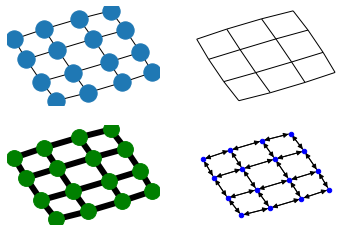

In [53]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.grid_2d_graph(4,4)

pos = nx.spring_layout(G,iterations=100)

plt.subplot(221)
nx.draw(G, pos, font_size = 8)

plt.subplot(222)

nx.draw(G, pos, node_color='k', node_size=0, with_labels=False)

plt.subplot(223)

nx.draw(G, pos, node_color='g', node_size=250, with_labels=False, width=6)

plt.subplot(224)
H = G.to_directed()
nx.draw(H, pos, node_color='b', node_size=20, with_labels=False)

plt.savefig("four_grids.png")
plt.show()

In [54]:
  
from bs4 import BeautifulSoup

import urllib.request as urllib2

opener = urllib2.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]

url = "http://scholar.google.com/scholar"

appendix = "?q=computer&btnG=&as_sdt=1%2C5&as_sdtp="

data = opener.open(url + appendix).read()

soup = BeautifulSoup(data)
for div in soup.find_all('div', {'class' : 'gs_r'}):
    print(div.prettify())

In [55]:
# Parser
from bs4 import BeautifulSoup
import urllib.request as urllib2

# Network and Visualizing
import networkx as nx
import matplotlib.pyplot as plt

# For polite bot
import time
import random

import datetime

url = "http://scholar.google.com"



class CitationGraph:

    def __init__(self, title=''):
        self.g = nx.Graph()

    def add_result(self, result):
        self.g.add_node(result.title)
        for paper in result.papers:
            self.g.add_node(paper.title, paper = paper)
            self.g.add_edge(result.title, paper.title)

    def draw(self, path):
        nx.draw(self.g)
        plt.savefig(path + ".png")


"""
    def extract(self, least_citations):
            if node['citations'] < least_citations:
                self.g.remove(node)
"""


"""
The information of papers gain from specific URL.
It also contains information about the context of the results. (ex. Cited or Related to the paper or a word search result)
"""
class Result:

    def __init__(self, query, title='', depth=1):
        self.title = title
        if 'cited' in query:
            context = 'cited'
        elif 'related' in query:
            context = 'related'
        else:
            context = 'search'
        self.query = query
        self.papers = []
        self.search(1)


    def search(self, depth=1):
        time.sleep(random.randint(10, 20))
        data = opener.open(url + self.query).read()
        soup = BeautifulSoup(data)

        for paper in soup.find_all('div', {'class' : 'gs_r'}):
            if paper is not None:
                temp1 = paper.find('div', {'class' : 'gs_ri'})
                if temp1 is not None:
                    title = temp1.find('a').get_text()
        

                temp2 = paper.find('div', {'class' : 'gs_a'})
                if temp2 is not None:
                    author = temp2.get_text()
        

                temp3 = paper.find('div', {'class' : 'gs_rs'})
                if temp3 is not None:
                    abst = temp3.get_text()

            for link in paper.find_all('a'):
                if 'Cited' in link.get_text():
                    cited_link = link.get('href')            
                    citations = int(link.get_text().strip('Cited by '))
            p = Paper(title, author, abst, cited_link, citations)    
            self.papers.append(p)


    def print_papers(self):
        for paper in self.papers:
            paper.print_data()
            
        

class Paper:
    def __init__(self, title, author, abst, cited_link, citations=0):
        self.title = title
        self.author = author
        self.abst = abst
        self.cited_link = cited_link
        self.citations = citations
        

    def print_data(self):
        print(self.title)
        print(self.author)
        print(self.abst)
        print(self.citations)
        print(self.cited_link)
        print('\n')

        


"""
Main Function 
"""

opener = urllib2.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
query = "/scholar?hl=en&q=computer&btnG=&as_sdt=1%2C5&as_sdtp="
r = Result(query, 'deep learning')
r.print_papers()
c = CitationGraph()
c.add_result(r)

for paper in r.papers:
    r2 = Result(paper.cited_link, paper.title)
    r2.print_papers()
    c.add_result(r2)

t = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# c.draw('whole' + t)
plt.show()

In [58]:
import requests
from bs4 import BeautifulSoup as bs

queries = ['Role for migratory wild birds in the global spread of avian influenza H5N8',
         'Uncoupling conformational states from activity in an allosteric enzyme',
         'Technological Analysis of the World’s Earliest Shamanic Costume: A Multi-Scalar, Experimental Study of a Red Deer Headdress from the Early Holocene Site of Star Carr, North Yorkshire, UK',
         'Oxidative potential of PM 2.5  during Atlanta rush hour: Measurements of in-vehicle dithiothreitol (DTT) activity',
         'Primary Prevention of CVD','Growth and Deposition of Au Nanoclusters on Polymer-wrapped Graphene and Their Oxygen Reduction Activity',
         'Relations of Preschoolers Visual-Motor and Object Manipulation Skills With Executive Function and Social Behavior',
         'We Know Who Likes Us, but Not Who Competes Against Us']

citation_dict = {}

with requests.Session() as s:
    for query in queries:
        url = 'https://scholar.google.com/scholar?q=' + query + '&ie=UTF-8&oe=UTF-8&hl=en&btnG=Search'
        r = s.get(url)
        soup = bs(r.content, 'lxml') # or 'html.parser'
        title = soup.select_one('h3.gs_rt a').text if soup.select_one('h3.gs_rt a') is not None else 'No title'
        link = soup.select_one('h3.gs_rt a')['href'] if title != 'No title' else 'No link'
        citations = soup.select_one('a:contains("Cited by")').text if soup.select_one('a:contains("Cited by")') is not None else 'No citation count'
        citations = citations.strip('Cited by ')
        
        # Add another column for citation count 
        citation_dict[title] = citations
        print(citations)
        

for title in citation_dict.keys():
    for item in articleInfo:
        if item['title'] == title:
            item['citation'] = citation_dict[title]
        

articlesPD2 = pd.DataFrame.from_dict(articleInfo)
articlesPD2

No citation coun
No citation coun
No citation coun
No citation coun
No citation coun
No citation coun
No citation coun
No citation coun


,pubmed_id,title,abstract,copyrights,publication_date,authors,keywords,journal,conclusions,methods,results
0,33181813,[Why is it important to detect atrophic gastri...,Gastric intestinal metaplasia and atrophic gas...,None,2020-11-13,"[{'lastname': 'Sarem', 'firstname': 'Muhannad'...",[],Revista de gastroenterologia del Peru : organo...,None,None,None
1,33181754,18F-FDG PET/CT in a Rare Case of Poland Syndro...,Poland syndrome is a rare congenital anomaly c...,None,2020-11-13,"[{'lastname': 'Loharkar', 'firstname': 'Sarves...",[],Clinical nuclear medicine,None,None,None
2,33181006,Postgastrectomy gastric cancer patients are at...,Several studies have shown that colorectal neo...,None,2020-11-13,"[{'lastname': 'Gweon', 'firstname': 'Tae-Geun'...","[Colonoscopic surveillance, Colonoscopy, Color...",Intestinal research,None,None,None
3,33180314,"Colonic interposition, a contemporary experien...",Colonic interposition is rarely used as an oes...,None,2020-11-13,"[{'lastname': 'Fearon', 'firstname': 'Naomi M'...","[Colon interposition, Oesophageal cancer, Surg...",Updates in surgery,None,None,None
4,33179620,"Precancerous lesions of the stomach, gastric c...",Gastric cancer accounts for about 6% of cancer...,Copyright © 2020 Società Italiana di Anatomia ...,2020-11-13,"[{'lastname': 'Gullo', 'firstname': 'Irene', '...","[gastric adenocarcinoma, gastric cancer, gastr...",Pathologica,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
1494,32160618,The Potential Role of Radiotherapy in the Mana...,Hepatoid adenocarcinoma (AC) of the stomach (H...,"© 2020 S. Karger AG, Basel.",2020-03-12,"[{'lastname': 'Ilyas', 'firstname': 'Waqas', '...","[Gastric cancer, Gastrointestinal cancer, Hepa...",Oncology research and treatment,RT may have a role in the multimodality manage...,None,None
1495,32160410,Inferior prognosis of gastric involvement in p...,Due to limited information reported on the cli...,© 2020 The Authors. Cancer Medicine published ...,2020-03-12,"[{'lastname': 'Xie', 'firstname': 'Yi', 'initi...","[SEER, gastric cancer, lymphoma, prognostic fa...",Cancer medicine,None,None,None
1496,32159312,[Differential diagnostics of gastric cancer an...,The lack of specific symptoms for the early de...,None,2020-03-12,"[{'lastname': 'Titov', 'firstname': 'S E', 'in...","[dysplasia, gastric cancer, miRNA, molecular d...",Klinicheskaia laboratornaia diagnostika,None,None,None
1497,32158613,,,© 2019 The Author(s). Published by Informa UK ...,2020-03-12,"[{'lastname': 'Lee', 'firstname': 'Hana', 'ini...","[Geranium thunbergii, apoptosis, cell cycle ar...",Animal cells and systems,None,None,None
